In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('../data/us-retail-sales.csv')
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [65]:
df['Month'] = pd.to_datetime(df['Month'])

In [66]:
df = df[['Month',"Clothing"]]
df = df[df.Month>=pd.to_datetime('2014-12-01')]

In [24]:
df['lag_1'] = df['Clothing'].shift(1)
df['lag_2'] = df['Clothing'].shift(2)
df['lead_1'] = df['Clothing'].shift(-1)

In [25]:
df['Centered_MA'] = (df['Clothing'] + df['lead_1'] + df['lag_1'])/3

In [26]:
df['Trailing_MA'] = (df['Clothing'] + df['lag_1'] + df['lag_2'])/3

In [33]:
display(df)

,Month,Clothing,lag_1,lag_2,lead_1,Centered_MA,Trailing_MA
275,2014-12-01,32760,NaN,NaN,15840.0,NaN,NaN
276,2015-01-01,15840,32760.0,NaN,18079.0,22226.333333,NaN
277,2015-02-01,18079,15840.0,32760.0,20819.0,18246.000000,22226.333333
278,2015-03-01,20819,18079.0,15840.0,20470.0,19789.333333,18246.000000
279,2015-04-01,20470,20819.0,18079.0,22239.0,21176.000000,19789.333333
...,...,...,...,...,...,...,...
331,2019-08-01,23829,21742.0,21116.0,19567.0,21712.666667,22229.000000
332,2019-09-01,19567,23829.0,21742.0,21400.0,21598.666667,21712.666667
333,2019-10-01,21400,19567.0,23829.0,25170.0,22045.666667,21598.666667
334,2019-11-01,25170,21400.0,19567.0,35157.0,27242.333333,22045.666667


f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

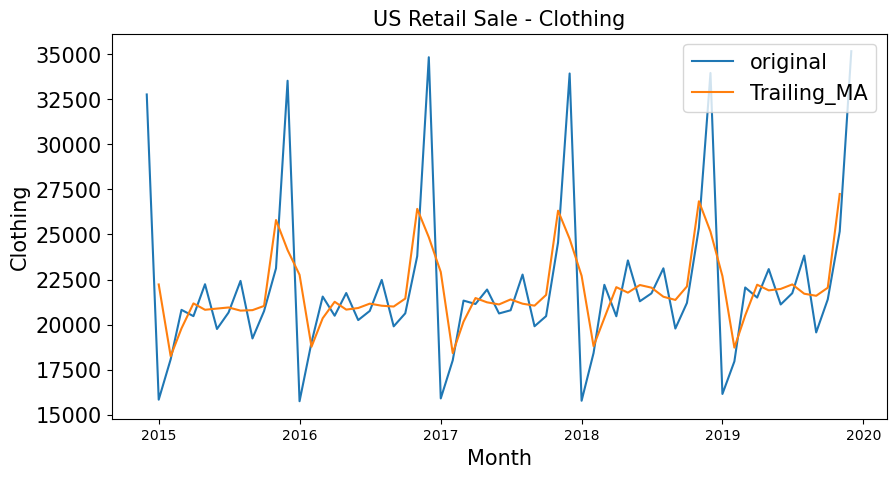

In [41]:
plt.figure(figsize=(10,5))
plt.title("US Retail Sale - Clothing", fontsize=15)
sns.lineplot(x='Month', y='Clothing', data=df, label='original')
# sns.lineplot(x='Month', y='Centered_MA', data=df, label='Centered_MA')
sns.lineplot(x='Month', y='Centered_MA', data=df, label='Trailing_MA')
plt.xlabel('Month',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Clothing',fontsize=15)
plt.legend(fontsize=15)

In [45]:
df['Clothing'].rolling(window=3, center=False).mean()

275             NaN
276             NaN
277    22226.333333
278    18246.000000
279    19789.333333
           ...     
331    22229.000000
332    21712.666667
333    21598.666667
334    22045.666667
335    27242.333333
Name: Clothing, Length: 61, dtype: float64

In [72]:
df = pd.read_csv('../data/us-retail-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])

In [79]:
df['BuildingMaterials_MA'] = df['BuildingMaterials'].rolling(window=6, center=False).mean()

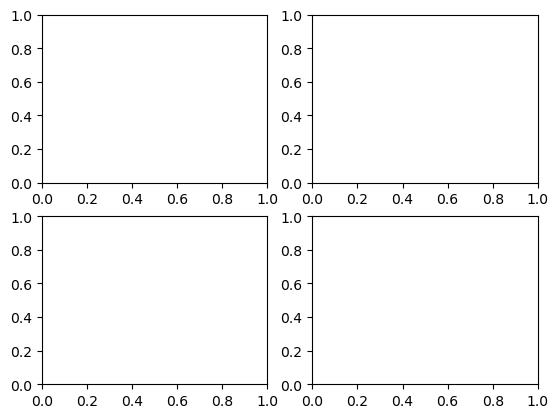

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: xlabel='Month', ylabel='BuildingMaterials'>

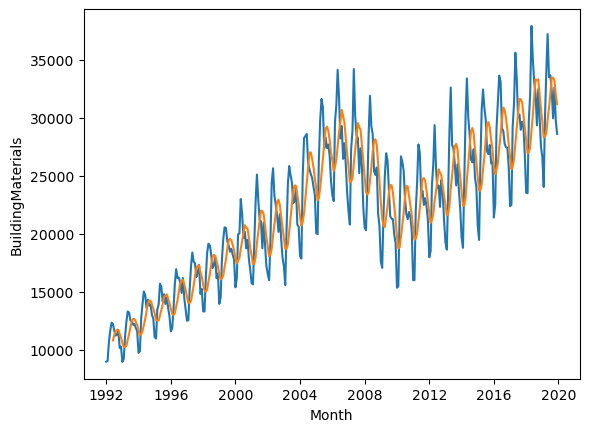

In [80]:
fig, axes = plt.subplots(2,2)
sns.lineplot(x='Month', y='BuildingMaterials', data=df)
sns.lineplot(x='Month', y='BuildingMaterials_MA', data=df)